In [ ]:
# y -> Whether the client has subscribed a term deposit or not 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# lib for logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import classification_report

In [3]:
# roc curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
# spliting the data

from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing the Data & Preprocessing

In [8]:
bank = pd.read_csv('bank-full.csv',delimiter=';')

In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# No missing values

In [12]:
# duplicates ?
bank[bank.duplicated()].shape

(0, 17)

In [ ]:
# no duplicates

### Data Type Conversion

In [ ]:
# categorical  - job, marital, education, contact,month,poutcome   
#binary - default,housing,loan, 
# y - to be predicted - binary

In [13]:
# categorical -> Dummies

bank_df = pd.get_dummies(bank,columns=['job','marital','education','contact','month','poutcome'])

In [14]:
bank_df['default'] = np.where(bank_df['default'].str.contains('yes'),1,0)
bank_df['housing'] = np.where(bank_df['housing'].str.contains('yes'),1,0)
bank_df['loan'] = np.where(bank_df['loan'].str.contains('yes'),1,0)
bank_df['y'] = np.where(bank_df['y'].str.contains('yes'),1,0)

In [15]:
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

### Creating Model

In [18]:
y = bank_df['y']
x = pd.concat([bank_df.iloc[:,0:10],bank_df.iloc[:,11:]],axis=1)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [20]:
lg = LogisticRegression()

model = lg.fit(x_train,y_train)

In [21]:
print(f'Coefficient is {model.coef_}')
print(f'Intercept is {model.intercept_}')

Coefficient is [[-1.60389717e-02 -2.58452848e-02  2.04440236e-05 -8.59259439e-01
  -2.66383444e-01 -9.23233516e-03  3.90038239e-03 -3.66437795e-01
   2.30287013e-03 -1.50294342e-01 -2.24363994e-02 -3.34936324e-01
  -3.57464779e-02 -8.08629850e-03  3.19527455e-03  2.10117246e-01
  -2.06969034e-02 -1.12558450e-01  4.01715572e-02 -8.56260389e-02
   1.08456613e-03  5.55916567e-03  1.96644951e-02 -2.20699419e-01
  -1.58924159e-01 -8.87572695e-02 -3.34508164e-01  5.52960678e-02
   8.01028266e-03  1.06852726e-01  7.35789966e-02 -5.40390805e-01
   5.31937180e-02  2.76341614e-02  3.57860064e-02 -2.33275224e-02
  -1.33069862e-02 -1.10463621e-01 -7.76582855e-02  1.05943374e-01
  -5.15042259e-01 -6.89988365e-02  1.32579981e-01  9.37011864e-02
  -1.70317175e-01 -4.04849066e-02  3.96498989e-01 -5.45655990e-01]]
Intercept is [-0.3600114]


In [22]:
y_pred = model.predict(x_train)

In [23]:
y_pred_df = pd.DataFrame({'Y Actual':y_train,'Y Predicted':y_pred})
y_pred_df.head()

,Y Actual,Y Predicted
10946,0,1
24896,1,0
29048,0,0
19404,0,0
25361,0,0


### Checking the Accuracy  on Train Data

In [26]:
print(f'Accuracy of Model is : {np.round(ac(y_train,y_pred),3)}')

Accuracy of Model is : 0.893


In [27]:
print(f'Confusion Matrix is : \n {confusion_matrix(y_train,y_pred)}')

Confusion Matrix is : 
 [[27405   542]
 [ 2857   843]]


In [28]:
print(f'Classification report for Train Data: \n {classification_report(y_train,y_pred)}')

Classification report for Train Data: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     27947
           1       0.61      0.23      0.33      3700

    accuracy                           0.89     31647
   macro avg       0.76      0.60      0.64     31647
weighted avg       0.87      0.89      0.87     31647



### Checking the Accuracy  on Test Data

In [29]:
y_pred_test = model.predict(x_test)

In [30]:
print(f'Accuracy of Model is : {np.round(ac(y_test,y_pred_test),3)}')

Accuracy of Model is : 0.893


In [31]:
print(f'Confusion Matrix is : \n {confusion_matrix(y_test,y_pred_test)}')

Confusion Matrix is : 
 [[11741   234]
 [ 1221   368]]


In [32]:
print(f'Classification report for Test Data: \n {classification_report(y_test,y_pred_test)}')

Classification report for Test Data: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11975
           1       0.61      0.23      0.34      1589

    accuracy                           0.89     13564
   macro avg       0.76      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



In [ ]:
# Accuracy of Model is same for Training & Test Data 

### Checking the Accuracy 

In [33]:
fpr,tpr,thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])

In [34]:
# area under curve

auc = roc_auc_score(y_train,y_pred)

print(f'Area Under The Curve : {auc}')

Area Under The Curve : 0.6042219925940897


Text(0.5, 1.0, 'ROC Curve')

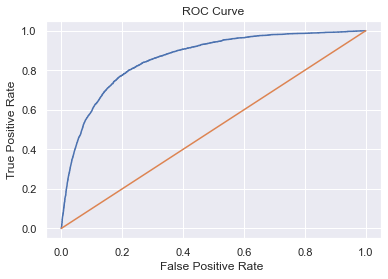

In [35]:
plt.plot(fpr,tpr,label='logit (area=%0.2f)'%auc)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')